# Turkey Electricity demo

Start notebook with import initialization

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

## Load dataset

We will use Pandas to load our dataset

In [2]:
electricity = pd.read_csv('../../datasets/public/turkey_elec.csv', parse_dates=[0], names=['date', 'usage'])
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 2 columns):
date     3288 non-null datetime64[ns]
usage    3288 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.5 KB
None


In [3]:
electricity.head()

,date,usage
0,2000-01-01,12551.500000
1,2000-01-02,13377.041667
2,2000-01-03,15300.625000
3,2000-01-04,15582.750000
4,2000-01-05,15691.750000


In [4]:
electricity.tail()

,date,usage
3283,2008-12-27,22546.000000
3284,2008-12-28,20477.791667
3285,2008-12-29,23093.000000
3286,2008-12-30,23493.625000
3287,2008-12-31,22919.000000


## Lets visualize it

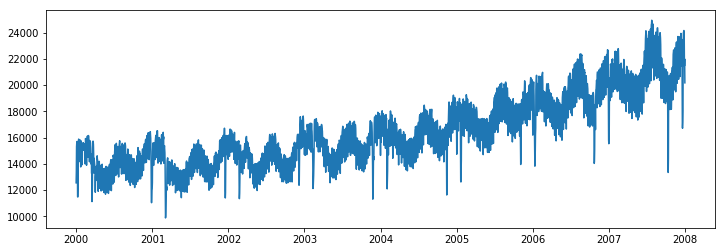

In [5]:
def plot_time_range(df, start_date='2000', end_date='2008'):
    df = df[(df.date >= start_date) & (df.date <= end_date)]
    plt.plot_date(df.date.astype(datetime), df.usage, fmt="-")
    plt.show()
    
plot_time_range(electricity)

### Usage in 2007

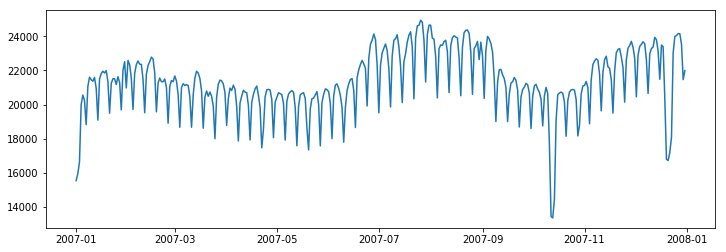

In [6]:
plot_time_range(electricity, '2007-01-01', '2007-12-31')

### Usage in 2008

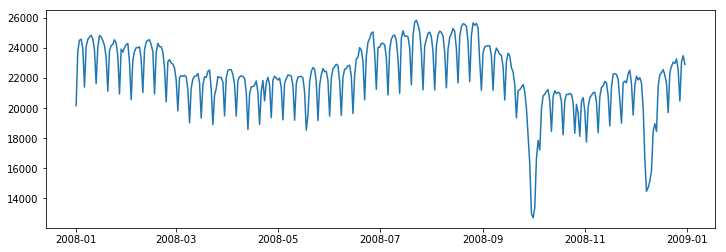

In [7]:
plot_time_range(electricity, '2008-01-01', '2008-12-31')

## Model definition

Out model interface will consists of 2 mothods:
  * fit(X, y)   - This function will train model
  * predict(X)  - Predict value

In [8]:
class RegressionModel:
    
    def fit(self, X, y):
        """
        Train model
        Arguments:
          X - Feature value matrics
          y - Expected labels
        """
        pass
    
    def predict(self, X):
        """
        Predict values for given features. This naive model just predicts 0
        Arguments
          X - Feature vector
        Returns
          y - Predicted values
        """
        return [0]*X.shape[0]

## Split into train and test

Since this is Time Series we will split by date.
Everything before given date will be used as training set and 1 month after given date will be used as test set.

In [9]:
def split_train_test(df, date):
    """
    Split time series into training and test set.
    Test set always consists of 1 month (if there is enough data)
    Arguments:
      df    -- Time series data frame
      date  -- Split dataset at this date
    Returns:
      (x_train, y_train, x_test, y_test) - Train and test datasets
    """
    split_date = datetime.strptime(date, "%Y-%m-%d")
    if split_date.month == 12:
        next_month = split_date.replace(year=split_date.year+1, month=1)
    else:
        next_month = split_date.replace(month=split_date.month+1)
    train = df[df.date < split_date]
    test = df[(df.date >= split_date) & (df.date < next_month)]
    return train.date, train.usage, test.date, test.usage

## Define cost function

We use Root Mean Squared Error as a cost function:

$$ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N}(y-\hat{y})^2}$$

where:

  * $N$ - Number of samples
  * $y$ - Predicted value
  * $\hat{y}$ - True value

In [19]:
def cost(y, y_hat):    
    return np.sqrt(metrics.mean_squared_error(y_hat, y))


def evaluate_year(year, model):
    """
    Evaluate model for all month in ginve year
    Returns
        Cost for each month
    """
    costs = []
    for i in range(12):
        split_date = "%d-%02d-%02d" % (year, i+1, 1)
        x_train, y_train, x_test, y_test = split_train_test(electricity, split_date)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        costs.append(cost(y_pred, y_test))
    return costs

## Make prediction

### Naive model single month

In [11]:
x_train, y_train, x_test, y_test = split_train_test(electricity, '2008-01-01')
model = RegressionModel()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Zero prediction: %.2f' % cost(y_pred, y_test))

Zero prediction: 23745.87


### Naive whole year

Average cost for year 2008 = 22196.73


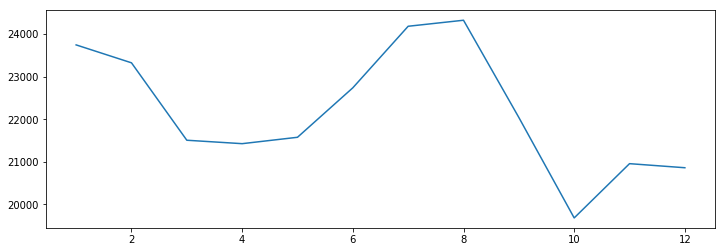

In [21]:
model = RegressionModel()
costs = evaluate_year(2008, model)
print('Average cost for year 2008 = %.2f' % np.mean(costs))
plt.plot(list(range(1, 13)), costs)
plt.show()